# Problem 1

According to scipy.fftpack document, fft function returns
$$
y(j) = sum[k=0..n-1] x[k] * e^{-\sqrt{-1}jk2\frac{\pi}{n}}, j = 0..n-1
$$
so my fft package returns the one returned by (1)

# Problem 2

According to scipy.fftpack document, ifft function returns
$$
y(j) = (x * exp(2*pi*sqrt(-1)*j*np.arange(n)/n)).mean()
$$
np.arange(n) returns evenly spaced points from 0 to n - 1, which corresponds to k in (4) and (5) $\newline$
Then .mean() calculates the mean value of (x * exp(2*pi*sqrt(-1)*j*np.arange(n)/n)), which corresponds to $\frac{1}{N}$.
So the fft package is using (5)

# Problem 3

Claim: If the $f_{j}$, for $j = 0, 1, \dots, N - 1$ are real numbers, then $c_{0}$ is real and $c_{N - k} = \bar c_{k}$, where the bar denotes complex conjugate $\newline$
Proof:To prove $c_{0}$ is real, set $k = 0$, we get
$$
c_{0} = \sum_{j = 1}^{N}f_{j}e^{0} = \sum_{j = 1}^{N}f_{j}
$$
Since we assum $f_{j}$ are real, $c_{0}$ is also real.
$\newline$

To prove $c_{N - k} = \bar c_{k}$, we will prove $\omega_{N}^{N - k} = \bar \omega_{N}^{k}$. Since $\omega_{N} = e^{-i2\pi \frac{1}{N}}$, we have
$$
\omega_{N}^{N - k} = e^{(-i2\pi \frac{1}{N})(N - k)} = e^{-i2\pi + i2\pi \frac{k}{N}} = e^{-i2\pi}e^{i2\pi \frac{k}{N}}
$$
Since $e^{-i2\pi} = 1$, 
$$
\omega_{N}^{N - k} = e^{i2\pi \frac{k}{N}}
$$
Also, 
$$
\bar \omega_{N}^{k} = e^{i2\pi \frac{k}{N}}
$$
so $$\omega_{N}^{N - k} = \bar \omega_{N}^{k}$$
Since the complex conjugate of $c_{k}$ is 
$$
\bar c_{k} = \frac{1}{N}\sum_{j = 0}^{N - 1}f_{j}\bar \omega_{k}^{N} = \frac{1}{N}\sum_{j = 0}^{N - 1}f_{j} \omega_{N}^{N - K} = c_{N - k}
$$

# Extra Stuff
Assume $f_{j}$ are real numbers. First, we will prove that $f_{j}$ are real iff $f_{j} = \bar f_{j}$. $\newline$
$\Rightarrow$ Choose an arbitray complex number $z = x + iy$ and assume it is real. Then the complex conjugate of $z$ is $\bar z = x - iy$. Since $z$ is real, it does not have the imaginery part, which means $z = x$ and $y = 0$. Thus, $\bar z = x = z$. $\newline$
$\Leftarrow$ Now assume $z = \bar z$. If we minus them we get 

$$z - \bar z = x + iy - x + iy$$
$$0 = 2iy$$
$$y = 0$$

This means z is real. 

# Problem 4
We want to relate the complex Fourier coefficients 
$$
c_{k} = \sum_{j = 0}^{N - 1}f_{j}e^{-i2 \pi kj\frac{1}{N}}
$$
with real Fourier coefficients $a_{k}, b_{k}$
$$
a_{k} = \frac{2}{N}\sum_{j = 0}^{N - 1}f_{j}coskx_{j} \text{ for } k = 0, \dots, \frac{N}{2}
$$
$$
b_{k} = \frac{2}{N}\sum_{j = 0}^{N - 1}f_{j}sinkx_{j} \text{ for } k = 1, \dots, \frac{N}{2} - 1
$$
Since $x_{j} = j(\frac{2\pi}{N})$, $c_{k}$ becomes
$$
c_{k} = \sum_{j = 0}^{N - 1}f_{j}e^{-ikx_{j}}
$$
Note that $e^{-ikx_{j}} = coskx_{j} - isinkx_{j}$, so 
$$
c_{k} = \sum_{j = 0}^{N - 1}f_{j}e^{-ikx_{j}} = \sum_{j = 0}^{N - 1}f_{j}(coskx_{j} - isinkx_{j}) = \sum_{j = 0}^{N - 1}f_{j}coskx_{j} - i\sum_{j = 0}^{N - 1}f_{j}sinkx_{j}
$$
Since 
$$
\frac{N}{2}a_{k} = \sum_{j = 0}^{N - 1}f_{j}coskx_{j}
$$
$$
\frac{N}{2}ib_{k} = i\sum_{j = 0}^{N - 1}f_{j}sinkx_{j}
$$
we have
$$
c_{k} = \frac{N}{2}a_{k} - i\frac{N}{2}b_{k}
$$

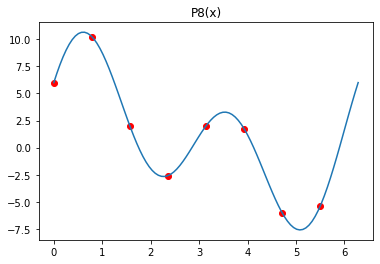

In [7]:
# This is the implementation of Fourier coefficients for problem 5 written by Jennie Wu
# Last Modified:
# Input:
# Expected Output:

from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
import math

fj = [6.000000000000000, 10.242640687119284,  2.000000000000000, -2.585786437626905, 2.000000000000000, 1.757359312880716, -6.000000000000000, -5.414213562373098]
N = 8

c_k = fft(fj)
a_k = [c_k.real[i] * 2 / N for i in range(N)]
b_k = [-c_k.imag[i] * 2 / N for i in range(N)]

def PN(x, N, ak, bk):
    total = 0
    for k in range(1, int(N / 2)):
        total += ak[k] * math.cos(k * x) + bk[k] * math.sin(k * x)
    return ak[0] / 2 + ak[int(N / 2)] / 2 * math.cos(N * x / 2) + total

x = np.linspace(0, 2 * math.pi, 100)
y = [PN(i, N, a_k, b_k) for i in x]

plt.plot(x, y) 
plt.title("P8(x)")
plt.scatter([j * 2 * math.pi / N for j in range(N)], fj, color = 'r', label = 'Nodes')
plt.show()


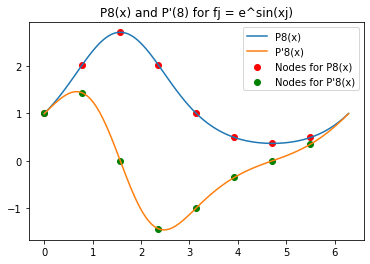

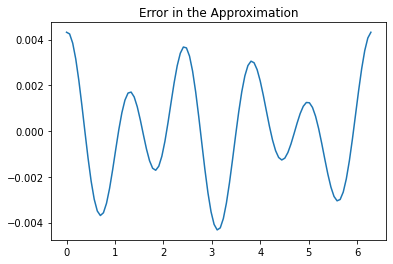

In [8]:
# This is the implementation of Fourier coefficients for problem 6 written by Jennie Wu
# Last Modified:
# Input:
# Expected Output:

x_j = [j * 2 * math.pi / N for j in range(N)]
f_j = [math.e ** (math.sin(x_j[i])) for i in range(N)]
c_k6 = fft(f_j)
a_k6 = c_k6.real * 2 / N
b_k6 = -c_k6.imag * 2 / N

y6 = [PN(i, N, a_k6, b_k6) for i in x]

def PNderivative(x, N, ak, bk):
    total = 0
    for k in range(1, int(N / 2)):
        total += - k * ak[k] * math.sin(k * x) + k * bk[k] * math.cos(k * x)
    return total - N * ak[int(N / 2)] / 4 * math.sin(N / 2 * x)
yderivative = [PNderivative(i, N, a_k6, b_k6) for i in x]

f_jderivative = [math.cos(x_j[i]) * math.e ** (math.sin(x_j[i])) for i in range(N)]

def fjderivative(x):
    return math.e ** (math.sin(x)) * math.cos(x)

plt.plot(x, y6, label = "P8(x)")
plt.scatter(x_j, f_j, color = 'r', label = 'Nodes for P8(x)')
plt.plot(x, yderivative, label = "P'8(x)") 
plt.scatter(x_j, f_jderivative, color = 'g', label = "Nodes for P'8(x)")
plt.legend()
plt.title("P8(x) and P'(8) for fj = e^sin(xj)")
plt.show()

error = [fjderivative(i) - PNderivative(i, N, a_k6, b_k6) for i in x]
# print all the error?
plt.plot(x, error)
plt.title("Error in the Approximation")
plt.show()


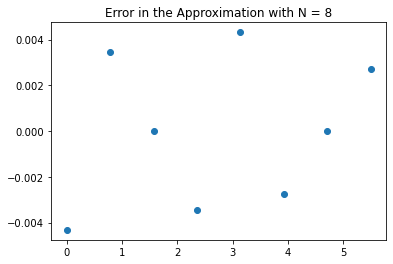

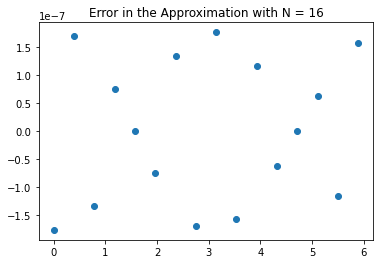

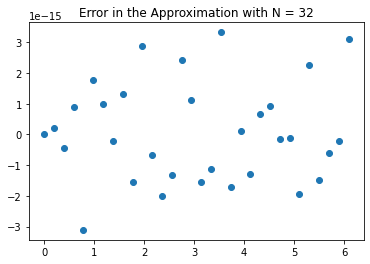

In [9]:
c_k8 = fft(f_j)
N = 16
x_j = [j * 2 * math.pi / N for j in range(N)]
f_j = [math.e ** (math.sin(x_j[i])) for i in range(N)]
c_k16 = fft(f_j)
N = 32
x_j = [j * 2 * math.pi / N for j in range(N)]
f_j = [math.e ** (math.sin(x_j[i])) for i in range(N)]
c_k32 = fft(f_j)

def k(N):
    lower = np.empty(int(N / 2))
    upper = np.empty(int(N / 2))
    for i in range(N):
        if i < N / 2:
            lower[i] = i
        else:
            upper[int(i - N / 2)] = i - N
    return np.concatenate([lower, upper])

PN8 = ifft(1j * k(8) * c_k8).real
PN16 = ifft(1j * k(16) * c_k16).real
PN32 = ifft(1j * k(32) * c_k32).real

x8 = np.linspace(0, 2 * math.pi, 8, endpoint = False)
fderivative8 = [fjderivative(i) for i in x8]
x16 = np.linspace(0, 2 * math.pi, 16, endpoint = False)
fderivative16 = [fjderivative(i) for i in x16]
x32 = np.linspace(0, 2 * math.pi, 32, endpoint = False)
fderivative32 = [fjderivative(i) for i in x32]

plt.plot(x8, PN8 - fderivative8, 'o')
plt.title("Error in the Approximation with N = 8")
plt.show()
plt.plot(x16, PN16 - fderivative16, 'o')
plt.title("Error in the Approximation with N = 16")
plt.show()
plt.plot(x32, PN32 - fderivative32, 'o')
plt.title("Error in the Approximation with N = 32")
plt.show()

In [10]:
import pandas as pd

question7 = [PNderivative(i, 8, a_k6, b_k6) for i in x8]

data = {"coefficients from question6": PN8, "coefficients from question7": question7, "Difference": PN8 - question7}
pd.DataFrame(data)

,coefficients from question6,coefficients from question7,Difference
0,9.956821e-01,9.956821e-01,0.000000e+00
1,1.437543e+00,1.437543e+00,0.000000e+00
2,5.551115e-16,7.209280e-16,-1.658165e-16
3,-1.437543e+00,-1.437543e+00,-2.220446e-16
4,-9.956821e-01,-9.956821e-01,2.220446e-16
5,-3.513817e-01,-3.513817e-01,0.000000e+00
6,-1.110223e-16,-1.772433e-16,6.622099e-17
7,3.513817e-01,3.513817e-01,2.220446e-16
